## hw_5_2

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [6]:
# 포함 기술스택: python, pandas
import pandas as pd

# 데이터 로드
file_path = 'data/movie_data.csv'
movies = pd.read_csv(file_path)
movies

,Title,Director,Year,Rating
0,Jaws,James Cameron,1985,8.2
1,E.T.,Steven Spielberg,2019,6.0
2,Jurassic Park,Steven Spielberg,2002,8.4
3,Schindler's List,Steven Spielberg,1999,8.7
4,Saving Private Ryan,James Cameron,1980,9.2
5,Indiana Jones,Steven Spielberg,1978,9.5
6,Catch Me If You Can,Christopher Nolan,1993,6.3
7,Minority Report,Christopher Nolan,2020,8.2
8,War of the Worlds,James Cameron,2009,8.3
9,The Terminal,Martin Scorsese,1999,6.9


In [5]:
# 사용자로부터 감독 이름 입력 받기
director_name = input("감독의 이름을 입력하세요: ")

# 특정 감독의 영화 필터링
director_movies = movies[movies['Director'] == director_name]

# 평균 평점 계산
average_rating = director_movies['Rating'].mean()
print(f"{director_name} 감독 영화의 평균 평점: {average_rating:.2f}")

# 가장 높은 평점을 받은 영화 찾기
best_movie = movies.sort_values('Rating',ascending=False).iloc[0]
print(f"가장 높은 평점을 받은 영화: {best_movie['Title']} ({best_movie['Rating']})")


Steven Spielberg 감독 영화의 평균 평점: 8.35
가장 높은 평점을 받은 영화: Lincoln (10.0)


## hw_5_4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

# 1. 데이터 로드 및 기본 정보 확인
# 주어진 주식 데이터 파일을 불러옴
file_path = "data/stock_data.csv"  # 실제 데이터 파일 경로
df = pd.read_csv(file_path)  # [빈칸] 데이터 파일을 불러오는 코드 작성

# 데이터의 첫 5행 출력 (EDA의 첫 단계)
print("📌 데이터 미리보기")
df.head()  # [빈칸] 데이터의 처음 몇 개의 행을 확인하는 코드 작성

📌 데이터 미리보기


,Date,Close
0,2023-01-02,95.50
1,2023-01-03,95.36
2,2023-01-04,96.01
3,2023-01-05,97.53
4,2023-01-06,97.30


In [3]:
# 데이터의 기본 정보 확인 (컬럼명, 데이터 타입, 결측값 확인)
print("\n📌 데이터 정보")
df.info()  # [빈칸] 데이터프레임의 정보를 출력하는 코드 작성


📌 데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    260 non-null    object 
 1   Close   260 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [5]:
# 2. 필요한 컬럼 선택 및 데이터 변환
# 'Date' 컬럼이 존재한다고 가정하고, 이를 날짜 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])  # [빈칸] 'Date' 컬럼을 datetime 형식으로 변환

# 'Close' 컬럼이 존재한다고 가정하고, 결측값 제거
df = df[['Date', 'Close']].dropna()  # [빈칸] 결측값이 있는 행을 제거하는 코드 작성

# 3. 월별 종가 평균 계산
# Date 컬럼을 기준으로 연-월 형태의 새로운 컬럼 생성 (YYYY-MM 형식)
df['YearMonth'] = df['Date'].dt.strftime('%Y-%m')  # [빈칸] 날짜 데이터에서 연-월을 추출하는 코드 작성

# 각 월별 종가의 평균 계산
monthly_avg_close = df.groupby('YearMonth')['Close'].mean().reset_index()  
# [빈칸] 'YearMonth'를 기준으로 'Close'의 평균을 계산하는 코드 작성
monthly_avg_close

,YearMonth,Close
0,2023-01,96.186364
1,2023-02,89.379000
2,2023-03,84.641304
3,2023-04,86.282500
4,2023-05,84.543913
5,2023-06,85.100455
6,2023-07,83.622857
7,2023-08,84.910000
8,2023-09,89.317143
9,2023-10,90.759545


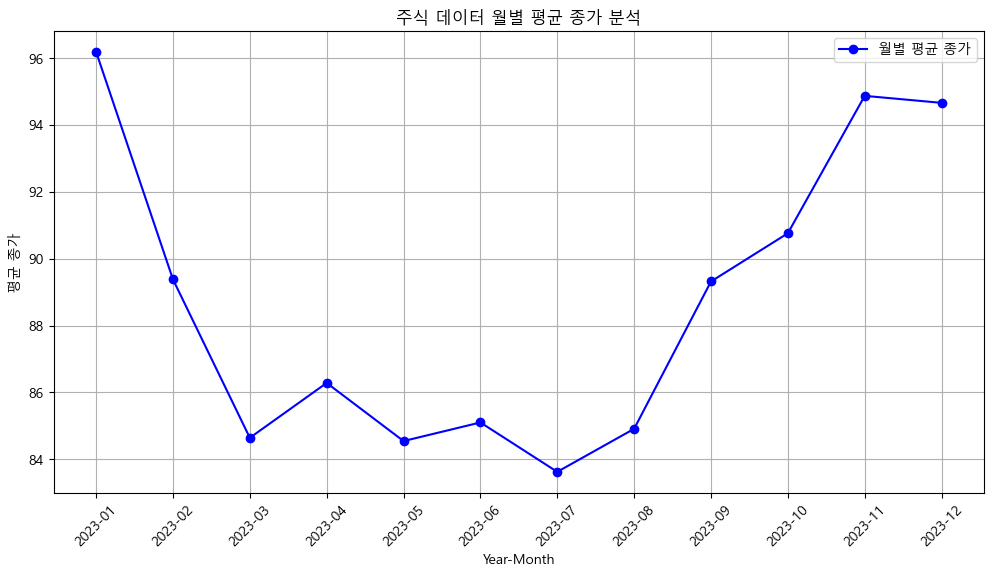

In [ ]:
# 4. 데이터 시각화 (월별 평균 종가)
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
plt.plot(monthly_avg_close['YearMonth'], monthly_avg_close['Close'], 
         marker='o', linestyle='-', color='b', label='월별 평균 종가')  
# [빈칸] X축: 'YearMonth', Y축: 'Close'를 지정하여 선 그래프를 그리는 코드 작성

# 그래프 제목 및 라벨 설정
plt.title('주식 데이터 월별 평균 종가 분석')
plt.xlabel('Year-Month')  # [빈칸] X축 라벨 설정
plt.ylabel('평균 종가')  # [빈칸] Y축 라벨 설정
plt.xticks(rotation=45)  # X축 라벨 회전
plt.legend()
plt.grid(True)  # 격자 추가

# 5. 결과 해석

# 1. 주어진 데이터를 활용하여 월별 평균 종가를 계산하였음.
# 2. 시각화를 통해 시간에 따른 평균 종가 변화를 파악할 수 있음.
# 3. 특정 월에 급격한 상승 또는 하락이 있다면, 외부 요인(예: 경제 이벤트, 시장 변동성 등)을 고려해야 함.
# 4. 평균 종가 변동이 일정하다면, 해당 주식은 안정적인 패턴을 보이는 것으로 해석 가능.

# 그래프 출력
plt.show()  # [빈칸] 그래프를 출력하는 코드 작성
